### Q 1.) Write a python program which searches all the product under a particular product from www.amazon.in. 
The product name to be searched will be taken as input from user. For e.g. If 
user input is ‘guitar’. Then search for guitars.

In [1]:
#import libraries
from selenium import webdriver
import time
import pandas as pd
from selenium.common.exceptions import NoSuchElementException

In [2]:
#connect to driver
driver=webdriver.Chrome(r"C://chromedriver.exe")
driver.maximize_window()

In [3]:
#website url
driver.get("https://www.amazon.in/")

In [4]:
#search bar selection
search_bar=driver.find_element_by_id("twotabsearchtextbox")

In [5]:
#take input from user: Note press enter after entering the input to get out of loop
print("what would you like to search today?")
search_for=input()

what would you like to search today?
Laptop


In [6]:
#send the input taken
search_bar.clear()
search_bar.send_keys(search_for)

In [7]:
#click on search icon
search_button=driver.find_element_by_id("nav-search-submit-button")
search_button.click()

### Q 2.) scrape the following details of each product listed in first 3 pages of your search results and save it in a dataframe and csv. 
In case if any product vertical has less than 3 pages in search results then scrape all the products available under that product vertical. Details to be scraped are: "Brand Name", "Name of the Product", "Rating", "No. of Ratings", "Price", "Return/Exchange", "Expected Delivery", "Availability", "Other Details" and “Product URL”. In case, if any of the details are missing for any of the product then 
replace it by “-“.

In [8]:
#fetch the urls of all products 
start_page = 0
end_page = 2
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath('//a[@class="a-link-normal s-no-outline"]')
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        # Moving to next page
        nxt_button = driver.find_element_by_xpath('//li[@class="a-last"]/a')      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath('//li[@class="a-disabled a-last"]/a').text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)                               # ReLoading the next page

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.


In [9]:
#check if all products from 1st 3 pages are scraped
len(urls)

48

#### NOTE: the expected delivery option is not available due to covid and hence i have not scraped it.

['HP', 'Lenovo']
['HP 15 Entry Level 15.6-inch HD Laptop (AMD 3020e/4GB/1TB HDD/Windows 10 Home/Jet Black/1.74 Kg), 15s-gy0003AU', 'Lenovo IdeaPad Slim 3 Intel Celeron N4020 15.6-inch HD Thin and Light Laptop (4GB/256GB SSD/Windows 10/Platinum Grey/1.7Kg), 81WQ003LIN']
['3.9 out of 5 stars', '3.9 out of 5 stars']
['418 ratings', '96 ratings']
['₹ 23,990.00', '₹ 26,990.00']
['7 Days Replacement', '7 Days Replacement']
['In stock.', 'Only 1 left in stock.']
['Technical Details Brand HP Manufacturer hp, HP Model Name 15s-gy0003AU Model Year 2020 Product Dimensions 35.9 x 24.2 x 2 cm; 1.74 Kilograms Batteries 1 Lithium ion batteries required. (included) RAM Size 4 GB Ram Memory Installed Size 4 GB Maximum Memory Supported 8 GB Ram Memory Technology DDR4 Hard Drive Size 1 TB Hard Drive Interface USB 3.1 Hard Disk Description HDD Optical Drive Type No Optical Drive Operating System Windows 10 Home Processor Brand AMD Processor Speed 1.2 GHz Processor Type A-Series Processor Count 1 Processor
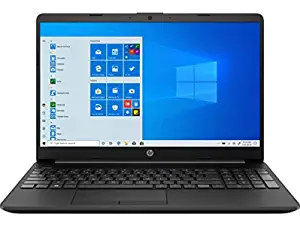

In [10]:
#create empty list
brand_list=[]
title_list=[]
rating_list=[]
no_rating_list=[]
price_list=[]
return_list=[]
availability_list=[]
details_list=[]
img_url_list=[]
     
#go to each items url to fetch data   
for a in urls:
    driver.get(a)
    #brand
    try:
        brand=driver.find_element_by_xpath("//table[@class='a-keyvalue prodDetTable']/tbody/tr[1]/td")
        brand_list.append(brand.text)
    except NoSuchElementException as e:
        brand_list.append("--")
    
    #scrap title for each item
    try:
        title=driver.find_element_by_xpath("//h1[@class='a-size-large a-spacing-none']")
        title_list.append(title.text)
    except NoSuchElementException as e:
        title_list.append("--")
    #ratings
    try:
        rating=driver.find_element_by_xpath("//*[@id='productDetails_detailBullets_sections1']/tbody/tr[2]/td")
        rating_list.append(rating.text.split("\n")[-1])
    except NoSuchElementException as e:
        rating_list.append("--")
        
    #number of ratings
    try:
        no_rating=driver.find_element_by_id("averageCustomerReviews")
        no_rating_list.append(no_rating.text)
    except NoSuchElementException as e:
        no_rating_list.append("--")
    #price
    try:
        price=driver.find_element_by_xpath("//table[@class='a-lineitem']/tbody/tr[2]/td[2]/span")
        price_list.append(price.text)
    except NoSuchElementException as e:
        price_list.append("--")  
    #return/exchange
    try:
        returns=driver.find_element_by_xpath("//div[@class='a-row icon-farm-wrapper']/div[2]/span/div[2]/a")
        return_list.append(returns.text)
    except NoSuchElementException as e:
        return_list.append("--")
    #availability
    try:
        availability=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-success']")
        availability_list.append(availability.text)
    except NoSuchElementException as e:
        availability_list.append("--")   
     #other details
    try:
        details=driver.find_element_by_xpath("//div[@class='a-row a-spacing-top-base']")
        details_list.append(details.text.replace("\n"," "))
    except NoSuchElementException as e:
        details_list.append("--")
     #product image url
    try:
        img_url=driver.find_element_by_xpath("//div[@class='imgTagWrapper']/img")
        img_url_list.append(img_url.get_attribute("src"))
    except NoSuchElementException as e:
        img_url_list.append("--")
        
print(brand_list[0:2])
print(title_list[0:2])
print(rating_list[0:2])
print(no_rating_list[0:2])
print(price_list[0:2])
print(return_list[0:2])
print(availability_list[0:2])
print(details_list[0:1])
print(img_url_list[0:2])

In [11]:
#check if the length of all lists are equal
print(len(brand_list))
print(len(title_list))
print(len(rating_list))
print(len(no_rating_list))
print(len(price_list))
print(len(return_list))
print(len(availability_list))
print(len(details_list))
print(len(img_url_list))

48
48
48
48
48
48
48
48
48


In [12]:
#creating data frame
df=pd.DataFrame({})
df['Brand']=brand_list
df['Name of the product']=title_list
df["Ratings"]=rating_list
df["No of ratings"]=no_rating_list
df['Price']=price_list
df['Return/Exchange']=return_list
df['Availability']=availability_list
df['Other details']=details_list
df['Product Urls']=img_url_list
df

,Brand,Name of the product,Ratings,No of ratings,Price,Return/Exchange,Availability,Other details,Product Urls
0,HP,HP 15 Entry Level 15.6-inch HD Laptop (AMD 302...,3.9 out of 5 stars,418 ratings,"₹ 23,990.00",7 Days Replacement,In stock.,"Technical Details Brand HP Manufacturer hp, HP...","data:image/webp;base64,UklGRnYVAABXRUJQVlA4IGo..."
1,Lenovo,Lenovo IdeaPad Slim 3 Intel Celeron N4020 15.6...,3.9 out of 5 stars,96 ratings,"₹ 26,990.00",7 Days Replacement,Only 1 left in stock.,Technical Details Brand Lenovo Manufacturer Le...,https://images-na.ssl-images-amazon.com/images...
2,Lenovo,Lenovo Ideapad Slim 3 AMD Athlon Silver 3050U ...,3.7 out of 5 stars,286 ratings,"₹ 28,990.00",7 Days Replacement,In stock.,Technical Details Brand Lenovo Manufacturer Le...,https://images-na.ssl-images-amazon.com/images...
3,AVITA,AVITA Essential NE14A2INC433-CR 14-inch Laptop...,3.9 out of 5 stars,439 ratings,"₹ 18,990.00",7 Days Replacement,In stock.,Technical Details Brand AVITA Manufacturer Alc...,"data:image/webp;base64,UklGRgwWAABXRUJQVlA4IAA..."
4,LifeDigital,"Life Digital Entry Level Laptop, (Intel Core i...",3.6 out of 5 stars,4 ratings,"₹ 21,990.00",7 Days Replacement,In stock.,Technical Details Brand LifeDigital Manufactur...,"data:image/webp;base64,UklGRv4LAABXRUJQVlA4IPI..."
5,ASUS,ASUS VivoBook 14 (2020) Intel Quad Core Pentiu...,4.0 out of 5 stars,18 ratings,"₹ 24,990.00",7 Days Replacement,In stock.,Technical Details Brand ASUS Manufacturer Asus...,"data:image/webp;base64,UklGRgAYAABXRUJQVlA4IPQ..."
6,HP,HP Chromebook 14a-na0003TU 14-inch Thin & Ligh...,3.7 out of 5 stars,173 ratings,"₹ 24,404.00",7 Days Replacement,In stock.,"Technical Details Brand HP Manufacturer hp, Ma...",https://images-na.ssl-images-amazon.com/images...
7,Dell,"Dell Inspiron 3502 15.6"" HD Display Laptop (Pe...",5.0 out of 5 stars,1 rating,"₹ 27,390.00",7 Days Replacement,In stock.,Technical Details Brand Dell Manufacturer Dell...,"data:image/webp;base64,UklGRv4SAABXRUJQVlA4IPI..."
8,Lenovo,Lenovo Ideapad Slim 3 AMD Ryzen 3 15.6 inch Fu...,3.4 out of 5 stars,493 ratings,"₹ 31,490.00",--,In stock.,Technical Details Brand Lenovo Manufacturer Le...,https://images-na.ssl-images-amazon.com/images...
9,HP,"HP 15 Thin & Light Ryzen 3-3250 Laptop, 4 GB R...",3.3 out of 5 stars,138 ratings,"₹ 31,999.00",--,In stock.,"Technical Details Brand HP Manufacturer hp, Ma...",https://images-na.ssl-images-amazon.com/images...


### Q 3 ) Write a python program to access the search bar and search button on images.google.com and scrape 100 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’.


In [13]:
#import libraries
import urllib.request
import os # to create directory

In [14]:
# step 1: visit the google images page
driver.get("https://images.google.com/?gws_rd=ssl")
#search for fruits
search_bar=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_bar.send_keys("Fruits")
time.sleep(2)

In [15]:
#click on the search button
search_button=driver.find_element_by_xpath("//div[@class='FAuhyb']")
search_button.click()

In [16]:
#scroll the page thrice to fetch upto 100 images
for i in range(0,3):
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")

In [17]:
#collect all the image urls
images=driver.find_elements_by_tag_name("img")

In [18]:
#fruit images
#make a folder to save the images
try:
    os.mkdir("fruit_images")
except FileExistsError:
    pass

count = 0
for i in images[0:100]: #as we need only 100 images 
    src=i.get_attribute('src')
    count+=1
    #download the image from url-->save to folder-->with image.count.jpg format
    urllib.request.urlretrieve(src, os.path.join('fruit_images','image'+str(count)+'.jpg')) 
    print("Number of images downloaded = "+str(count),end='\r')
#check the downloaded images in your cwd and folder named fruit images

In [19]:
# Downloading images for cars
# step 1: visit the google images page
driver.get("https://images.google.com/?gws_rd=ssl")
#search for cars
search_bar=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_bar.send_keys("Cars")
time.sleep(1)

In [20]:
#click on the search button
search_button=driver.find_element_by_xpath("//div[@class='FAuhyb']")
search_button.click()

In [21]:
#scroll the page
for i in range(0,4):
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")

In [22]:
#collect all the image urls
car_images=driver.find_elements_by_tag_name("img")

In [23]:
#make a folder to save the images
try:
    os.mkdir("car_images")
except FileExistsError:
    pass
#download the image
count = 0
for i in car_images[0:100]:
    src=i.get_attribute('src')
    count+=1
    urllib.request.urlretrieve(src, os.path.join('car_images','image'+str(count)+'.jpg'))
    print("Number of images downloaded = "+str(count),end='\r')

In [24]:
#Downloading machine learning images

# step 1: visit the google images page
driver.get("https://images.google.com/?gws_rd=ssl")
#search for machine learning images
search_bar=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_bar.send_keys("Machine Learning")
time.sleep(1)
#click on the search button
search_button=driver.find_element_by_xpath("//div[@class='FAuhyb']")
search_button.click()
time.sleep(1)
#scroll the page
for i in range(0,4):
    driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")

#collect all the image urls
ML_images=driver.find_elements_by_tag_name("img")

#make a folder to save the images
try:
    os.mkdir("ML_images")
except FileExistsError:
    pass
#download the image from url-->save to folder-->with image.count.jpg format
count = 0
for i in ML_images[0:100]:
    src=i.get_attribute('src')
    count+=1
    urllib.request.urlretrieve(src, os.path.join('ML_images','image'+str(count)+'.jpg'))
    print("Number of images downloaded = "+str(count),end='\r')

### Q.4 ) Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com 
scrape following details for all the search results displayed on 1st page. 
Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, 
“Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Display 
Resolution”, “Processor”, “Processor Cores”, “Battery Capacity”, “Price”, “Product URL”. 
Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe 
and CSV.


In [25]:
#connect to driver and pass the url
driver.get("http://www.flipkart.com/")

In [26]:
#search the search products bar---> enter "smartphone"--->click on search icon
search_bar=driver.find_element_by_xpath("//div[@class='_3OO5Xc']/input")
search_bar.send_keys("smartphone")

In [27]:
#click on search
search_button=driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [28]:
#grab all the links of mobile phones to visit to next page 
url_list=[]
for i in driver.find_elements_by_xpath("//a[@class='_1fQZEK']"):
    url_list.append(i.get_attribute("href"))
url_list[0:2]

['https://www.flipkart.com/realme-c20-cool-blue-32-gb/p/itmea1903897436b?pid=MOBGF4894MEWZJGV&lid=LSTMOBGF4894MEWZJGVW425N5&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=2062306c-4d49-4456-bc7d-7cb524b7cad9.MOBGF4894MEWZJGV.SEARCH&ppt=hp&ppn=homepage&ssid=1o35wlhy6o0000001618833522411&qH=1036ba3c4ed2c021',
 'https://www.flipkart.com/realme-c20-cool-grey-32-gb/p/itmea1903897436b?pid=MOBGF489SQZCFHYA&lid=LSTMOBGF489SQZCFHYAGB7SDS&marketplace=FLIPKART&q=smartphone&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=2062306c-4d49-4456-bc7d-7cb524b7cad9.MOBGF489SQZCFHYA.SEARCH&ppt=hp&ppn=homepage&ssid=1o35wlhy6o0000001618833522411&qH=1036ba3c4ed2c021']

In [29]:
#go to the link of each mobile phone and extract the details required

#create empty lists
brand_list=[]
smartphone=[]
color_list=[]
ram_list=[]
rom_list=[]
primary_camera_list=[]
secondary_camera_list=[]
display_list=[]
resolution_list=[]
processor_list=[]
processor_core_list=[]
battery_list=[]
price_list=[]
product_url=[]


#go to each mobile's link
for a in url_list:
    driver.get(a)
    #brand (as the brand is not mentioned on web page we will scrap phone name only as brand)
    brand=driver.find_element_by_xpath("//span[@class='B_NuCI']")
    brand_list.append(brand.text)
    
    #smartphone name
    title=driver.find_element_by_xpath("//span[@class='B_NuCI']")
    smartphone.append(title.text)
    #click on read more button to get all specifications
    read_more=driver.find_element_by_xpath("//button[@class='_2KpZ6l _1FH0tX']")
    read_more.click()
    #color
    color=driver.find_element_by_xpath("//table[@class='_14cfVK']/tbody/tr[4]/td[2]")
    color_list.append(color.text)
    #ram
    try:
        ram=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[4]/table/tbody/tr[2]/td[2]/ul/li[contains(text(),'GB')]")
        ram_list.append(ram.text) 
    except NoSuchElementException as e:
        ram_list.append("--") 
    #storage/rom
    try:
        rom=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[4]/table/tbody/tr[1]/td[2]/ul/li[contains(text(),'GB')]")
        rom_list.append(rom.text)
    except NoSuchElementException as e:
        rom_list.append("--")
    #primary camera (handling exception)
    try:
        pcam=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[5]/table/tbody/tr[2]/td[2]/ul/li[contains(text(),'MP')]")
        primary_camera_list.append(pcam.text)
    except NoSuchElementException as e:
        primary_camera_list.append("--")
    #secondary camera (handling exception)
    try:
        scam=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[5]/table/tbody/tr[5]/td[2]/ul/li[contains(text(),'MP')]")
        secondary_camera_list.append(scam.text) 
    except NoSuchElementException as e:
        secondary_camera_list.append("--") 
    #display
    try:
        display=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[2]/table/tbody/tr[1]/td[2]/ul/li[contains(text(),'inch')]")
        display_list.append(display.text) 
    except NoSuchElementException as e:
        display_list.append("--")
    #resolution
    try:
        resolution=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[2]/table/tbody/tr[2]/td[2]/ul/li[contains(text(),'x')]")
        resolution_list.append(resolution.text) 
    except NoSuchElementException as e:
        resolution_list.append("--")
    #processor type
    processor=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[3]/table/tbody/tr[2]/td[2]/ul/li")
    if processor.text=='Octa Core':
        processor_list.append("--")
    elif processor.text=="1792 x 828 Pixels":
        processor_list.append("--")
    else:
        processor_list.append(processor.text)
    #processor core
    try:
        core=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[3]/table/tbody/tr[3]/td[2]/ul/li[contains(text(),'Core')]")
        processor_core_list.append(core.text) 
    except NoSuchElementException as e:
        processor_core_list.append("--") 
    #battery
    try:
        battery=driver.find_element_by_xpath("//div[@class='_1UhVsV']/div[9]/table/tbody/tr/td[2]/ul/li[contains(text(),'mAh')]")
        battery_list.append(battery.text) 
    except NoSuchElementException as e:
        battery_list.append("--") 
    #price
    price=driver.find_element_by_xpath("//div[@class='_25b18c']/div")
    price_list.append(price.text)
    #product url
    img=driver.find_element_by_xpath("//div[@class='CXW8mj _3nMexc']/img")
    product_url.append(img.get_attribute("src"))  

#view the output    
print(color_list[0:2])
print(brand_list[0:2])
print(smartphone[0:2])
print(ram_list[0:2])
print(rom_list[0:2])
print(primary_camera_list[0:2])
print(secondary_camera_list[0:2])
print(display_list[0:2])
print(resolution_list[0:2])
print(processor_list[0:2])
print(processor_core_list[0:2])
print(battery_list[0:2])
print(price_list[0:2])
print(product_url[0:2])

['Cool Blue', 'Cool Grey']
['realme C20 (Cool Blue, 32 GB)  (2 GB RAM)', 'realme C20 (Cool Grey, 32 GB)  (2 GB RAM)']
['realme C20 (Cool Blue, 32 GB)  (2 GB RAM)', 'realme C20 (Cool Grey, 32 GB)  (2 GB RAM)']
['2 GB', '2 GB']
['32 GB', '32 GB']
['8MP Rear Camera', '8MP Rear Camera']
['5MP Front Camera', '5MP Front Camera']
['16.51 cm (6.5 inch)', '16.51 cm (6.5 inch)']
['1600 x 720 Pixels', '1600 x 720 Pixels']
['MediaTek Helio G35', 'MediaTek Helio G35']
['Octa Core', 'Octa Core']
['5000 mAh', '5000 mAh']
['₹6,799', '₹6,799']
['https://rukminim1.flixcart.com/image/416/416/kn7sdjk0/mobile/w/h/q/c20-rmx3063-realme-original-imagfxfzay72jqvh.jpeg?q=70', 'https://rukminim1.flixcart.com/image/416/416/kn7sdjk0/mobile/7/9/u/c20-rmx3063-realme-original-imagfxfzjrkqtbhe.jpeg?q=70']


In [30]:
#check the size of all lists
print(len(brand_list))
print(len(smartphone))
print(len(color_list))
print(len(ram_list))
print(len(rom_list))
print(len(primary_camera_list))
print(len(secondary_camera_list))
print(len(display_list))
print(len(resolution_list))
print(len(processor_list))
print(len(processor_core_list))
print(len(battery_list))
print(len(price_list))
print(len(product_url))

24
24
24
24
24
24
24
24
24
24
24
24
24
24


In [31]:
#create dataframe
df=pd.DataFrame({})
df["Brand"]=brand_list
df["Smartphone Name"]=smartphone
df["Color"]=color_list
df["RAM"]=ram_list
df["storage(ROM)"]=rom_list
df["Primary camera"]=primary_camera_list
df["Secondary camera"]=secondary_camera_list
df["Display Size"]=display_list
df["Display Resolution"]=resolution_list
df["Processor"]=processor_list
df["Processor Core"]=processor_core_list
df["Battery Capacity"]=battery_list
df["Price"]=price_list
df["Product url"]=product_url
df


,Brand,Smartphone Name,Color,RAM,storage(ROM),Primary camera,Secondary camera,Display Size,Display Resolution,Processor,Processor Core,Battery Capacity,Price,Product url
0,"realme C20 (Cool Blue, 32 GB) (2 GB RAM)","realme C20 (Cool Blue, 32 GB) (2 GB RAM)",Cool Blue,2 GB,32 GB,8MP Rear Camera,5MP Front Camera,16.51 cm (6.5 inch),1600 x 720 Pixels,MediaTek Helio G35,Octa Core,5000 mAh,"₹6,799",https://rukminim1.flixcart.com/image/416/416/k...
1,"realme C20 (Cool Grey, 32 GB) (2 GB RAM)","realme C20 (Cool Grey, 32 GB) (2 GB RAM)",Cool Grey,2 GB,32 GB,8MP Rear Camera,5MP Front Camera,16.51 cm (6.5 inch),1600 x 720 Pixels,MediaTek Helio G35,Octa Core,5000 mAh,"₹6,799",https://rukminim1.flixcart.com/image/416/416/k...
2,"APPLE iPhone 11 (Black, 64 GB)","APPLE iPhone 11 (Black, 64 GB)",Black,--,--,--,--,--,--,--,--,--,"₹44,999",https://rukminim1.flixcart.com/image/416/416/k...
3,"REDMI 9i (Nature Green, 64 GB) (4 GB RAM)","REDMI 9i (Nature Green, 64 GB) (4 GB RAM)",Nature Green,4 GB,64 GB,13MP Rear Camera,5MP Front Camera,16.59 cm (6.53 inch),1600 x 720 Pixels,MediaTek Helio G25,Octa Core,--,"₹7,999",https://rukminim1.flixcart.com/image/416/416/k...
4,"POCO X3 Pro (Graphite Black, 128 GB) (6 GB RAM)","POCO X3 Pro (Graphite Black, 128 GB) (6 GB RAM)",Graphite Black,6 GB,128 GB,48MP + 8MP + 2MP + 2MP,20MP Front Camera,16.94 cm (6.67 inch),2400 x 1080 Pixels,Qualcomm Snapdragon 860,Octa Core,5160 mAh,"₹18,999",https://rukminim1.flixcart.com/image/416/416/k...
5,"REDMI 9i (Midnight Black, 64 GB) (4 GB RAM)","REDMI 9i (Midnight Black, 64 GB) (4 GB RAM)",Midnight Black,4 GB,64 GB,13MP Rear Camera,5MP Front Camera,16.59 cm (6.53 inch),1600 x 720 Pixels,MediaTek Helio G25,Octa Core,--,"₹7,999",https://rukminim1.flixcart.com/image/416/416/k...
6,"POCO M3 (Cool Blue, 128 GB) (6 GB RAM)","POCO M3 (Cool Blue, 128 GB) (6 GB RAM)",Cool Blue,6 GB,128 GB,48MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080 Pixels,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹11,999",https://rukminim1.flixcart.com/image/416/416/k...
7,"POCO M3 (Cool Blue, 64 GB) (6 GB RAM)","POCO M3 (Cool Blue, 64 GB) (6 GB RAM)",Cool Blue,6 GB,64 GB,48MP + 2MP + 2MP,8MP Front Camera,16.59 cm (6.53 inch),2340 x 1080 Pixels,Qualcomm Snapdragon 662,Octa Core,6000 mAh,"₹10,999",https://rukminim1.flixcart.com/image/416/416/k...
8,"APPLE iPhone 11 (Purple, 64 GB)","APPLE iPhone 11 (Purple, 64 GB)",Purple,--,--,--,--,--,--,--,--,--,"₹44,999",https://rukminim1.flixcart.com/image/416/416/k...
9,"POCO X3 Pro (Steel Blue, 128 GB) (6 GB RAM)","POCO X3 Pro (Steel Blue, 128 GB) (6 GB RAM)",Steel Blue,6 GB,128 GB,48MP + 8MP + 2MP + 2MP,20MP Front Camera,16.94 cm (6.67 inch),2400 x 1080 Pixels,Qualcomm Snapdragon 860,Octa Core,5160 mAh,"₹18,999",https://rukminim1.flixcart.com/image/416/416/k...


In [32]:
#creating csv
df.to_csv("flipkart_smartphones.csv")

### Q.5 ) Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.





In [33]:
#pass the google map url
driver.get("https://www.google.com/maps/@18.4781013,73.9242248,15z")

In [34]:
#find the search box
time.sleep(1)
search_box=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")

In [35]:
#taking user input
print("Which city would you like to search?")
city = input()

Which city would you like to search?
Pune


In [36]:
#send the keys
search_box.clear()
search_box.send_keys(city)
time.sleep(1)

In [37]:
#click on the search button
search_button=driver.find_element_by_xpath("//button[@class='searchbox-searchbutton']")
search_button.click()
time.sleep(2)

In [38]:
#getting the xpath of url of searched city
url=driver.find_element_by_xpath("//a[@class='gb_ae gb_4 gb_4c']")
time.sleep(2)

In [39]:
#get url
a=url.get_attribute("href")
a

'https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https%3A%2F%2Fwww.google.com%2Fmaps%2Fplace%2FPune%2C%2BMaharashtra%2F%4018.5247663%2C73.7929273%2C12z%2Fdata%3D!3m1!4b1!4m5!3m4!1s0x3bc2bf2e67461101%3A0x828d43bf9d9ee343!8m2!3d18.5204303!4d73.8567437&service=local&ec=GAZAcQ'

In [40]:
#getting latitude from the url
latitude=a.replace("//","").split("2F%40")[1].split("%2C")[0]
latitude

'18.5247663'

In [41]:
#extracting longitude from url
longitude=a.replace("//","").split("%2C")[2]
longitude

'73.7929273'

In [42]:
#create dataframe
google_map_df=pd.DataFrame({})
google_map_df["City"]=[city]
google_map_df["Latitude"]=[latitude]
google_map_df["Longitude"]=[longitude]
google_map_df

,City,Latitude,Longitude
0,Pune,18.5247663,73.7929273


### Q 6 ) Write a program to scrap all the available details of top 10 gaming laptops from digit.in.

In [67]:
# visit the web page
driver.get("https://www.digit.in/laptops/")
time.sleep(1)

In [68]:
#click on the top 10 gaming laptops
gaming_laptop=driver.find_element_by_xpath("//ul[@class='list-unstyled sidebar-list']/li[10]")
gaming_laptop.click()

In [69]:
#extracting titles
title_list=[]
for i in driver.find_elements_by_xpath("//div[@class='right-container']/div//a/h3"):
    title_list.append(i.text.replace("\n",''))
print(title_list[0:2])

#seller details
seller_list=[]
for i in driver.find_elements_by_xpath("//td[@class='smmerchant']"):
    seller_list.append(i.text.replace("\n",''))
print(seller_list[0:2])

['MSI GT76 TITAN DT 9SG', 'ALIENWARE 17 AREA-51M']
['N/A', 'amazon']


In [70]:
#extracting details:
details=[]
for i in driver.find_elements_by_xpath("//div[@class='value']"):
    details.append(i.text)
details[0:4]

#As we can see we are getting 4 details from this list i.e. 1) os 2) display 3) processor 4) Memory so we shall segregrate the data accordingly to each spec

#seperating the list contents based on indexing
os_list=[]
display_list=[]
processor_list=[]
memory_list=[]

count=0
while count<int(len(details)):
    os_list.append(details[count])
    display_list.append(details[count+1])
    processor_list.append(details[count+2])
    memory_list.append(details[count+3])
    count=count+4 

#check if the details are segregatted
print(os_list[0:2])
print(display_list[0:2])
print(processor_list[0:2])
print(memory_list[0:2])


['WINDOWS 10 PRO', 'WINDOWS 10 PRO']
['17.3" (UHD 3840X2160)', '17.3" (FHD (1920 X 1080))']
['INTEL 9TH GEN CORE I9-9900K | 5000 MHZ', 'INTEL 9TH GEN CORE I9-9900K | 5000 MHZ']
['1 TB HDD/64 GBGB DDR4', '1 TB PCIE SSD/32GB DDR4']


In [71]:
#specifications
specs_list=[]
for i in driver.find_elements_by_xpath("//div[@class='Spcs-details']"):
    specs_list.append(i.text.replace("\n","").split("SPECIFICATIONOS :")[1])
print(specs_list[0:2])

#overview
overview_list=[]
for i in driver.find_elements_by_xpath("//div[@class='Section-center']/p"):
    overview_list.append(i.text)
print(overview_list[-1])

[' Windows 10 ProDisplay : 17.3" (UHD 3840x2160)Processor : Intel 9th Gen Core i9-9900K | 5000 MHzMemory : 1 TB HDD/64 GBGB DDR4Weight : 4.2 kgDimension : 397 x 330 x 33~42 mmGraphics Processor : NVIDIA GeForce RTX 2080Price : ₹379990', ' Windows 10 ProDisplay : 17.3" (FHD (1920 x 1080))Processor : Intel 9th Gen Core i9-9900K | 5000 MHzMemory : 1 TB PCIe SSD/32GB DDR4Weight : 3.87 KgDimension : 42 mm x 402.6 mm x 319.14 mmGraphics Processor : NVIDIA GeForce RTX 2080']
The Dell G3 is a capable entry-level gaming laptop in an Inspiron's clothes. It has a 9th-gen Intel Core i5 CPU, up to 8GB of RAM, and an NVIDIA GeForce GTX 1650 with 4GB of GDDR5 video RAM. For storage, it's got a 512GB PCIe NVMe SSD. It plays games like Doom on high graphics settings at 60fps without any stutters.


#### For rest of the details we will visit each url and fetch the details

In [72]:
#get all the links
urls=driver.find_elements_by_xpath("//div[@class='right-container']/div/a")
url_list=[]
for i in urls:
    url_list.append(i.get_attribute("href"))
url_list

['https://www.digit.in/laptops/msi-gt76-titan-dt-9sg-price-193526.html',
 'https://www.digit.in/laptops/alienware-area-51m-core-i9-9900k-rtx-2080-price-193540.html',
 'https://www.digit.in/laptops/hp-omen-15-2020-price-207633.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-price-209173.html',
 'https://www.digit.in/laptops/lenovo-legion-y540-price-184975.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g-ga502-price-187290.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-s-gx531-price-183275.html',
 'https://www.digit.in/laptops/msi-gt83vr-7re-titan-sli-price-55229.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-duo-15-price-215799.html',
 'https://www.digit.in/laptops/dell-g3-15-price-172543.html']

In [73]:
#fetch details by visiting each page
pros_list=[]
cons_list=[]
price_list=[]
market_status_list=[]
release_date=[]
official_website=[]
digit_rating_list=[]
user_rating_list=[]
for a in url_list:
    driver.get(a) 
    
    try:
        #pros
        pros=driver.find_element_by_xpath("//div[@class='pros-Cons']/ul[1]")
        pros_list.append(pros.text.replace("\n","").split('Pros')[1].replace("+",""))
        #cons
        cons=driver.find_element_by_xpath("/html/body/div[7]/div/div/div[10]/div/div[2]/div/ul[2]")
        cons_list.append(cons.text.replace("\n","").split("Cons")[1])
        #digit ratings
        digit=driver.find_element_by_xpath("//div[@class='score-Bar']/ul/li[1]")
        digit_rating_list.append(digit.text.split("\n")[1])
        #user ratings
        user=driver.find_element_by_xpath("//div[@class='score-Bar']/ul/li[2]")
        user_rating_list.append(user.text.split("\n")[1])
    except NoSuchElementException as e:
        pros_list.append("--")
        cons_list.append("-")
        digit_rating_list.append("--")
        user_rating_list.append("--")
        
    
    #price
    for k in driver.find_elements_by_xpath("//div[@class='Block-price']"):
        price_list.append(k.text.split("(")[0])   
        
    #market status,release date and official website
    
    for i in driver.find_elements_by_xpath("//div[@class='status-bar only-desktop']/div[1]"):
        market_status_list.append(i.text.split(":")[1]) 
    for x in  driver.find_elements_by_xpath("//div[@class='status-bar only-desktop']/div[2]"):   
        release_date.append(x.text.split(":")[1])
    for y in  driver.find_elements_by_xpath("//div[@class='status-bar only-desktop']/div[3]"):   
        official_website.append(y.text.split(":")[1])

In [74]:
#check the lengths of all scraoed data
print(len(title_list))
print(len(seller_list))
print(len(os_list))
print(len(display_list))
print(len(processor_list))
print(len(memory_list))
print(len(overview_list))
print(len(specs_list))
print(len(price_list))
print(len(release_date))
print(len(pros_list))
print(len(cons_list))
print(len(market_status_list))
print(len(official_website))
print(len(user_rating_list))
print(len(digit_rating_list))

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [75]:
#creating dataframe
df=pd.DataFrame({})
df['Title']=title_list
df['Seller']=seller_list
df['OS']=os_list
df['Processor']=processor_list
df['Display']=display_list
df['Memory']=memory_list
df["Specifications"]=specs_list
df["Price"]=price_list
df["Release Date"]=release_date
df["User Ratings"]=user_rating_list
df["Digit Ratings"]=digit_rating_list
df["Overview"]=overview_list
df["Pros"]=pros_list
df["cons"]=cons_list
df["Market Status"]=market_status_list
df["Official Website"]=official_website
df

,Title,Seller,OS,Processor,Display,Memory,Specifications,Price,Release Date,User Ratings,Digit Ratings,Overview,Pros,cons,Market Status,Official Website
0,MSI GT76 TITAN DT 9SG,N/A,WINDOWS 10 PRO,INTEL 9TH GEN CORE I9-9900K | 5000 MHZ,"17.3"" (UHD 3840X2160)",1 TB HDD/64 GBGB DDR4,"Windows 10 ProDisplay : 17.3"" (UHD 3840x2160)...","Price : 379,990",10-Aug-2019,--,--,Sporting a desktop graphics Intel Core i9-9900...,--,-,LAUNCHED,MSI
1,ALIENWARE 17 AREA-51M,amazon,WINDOWS 10 PRO,INTEL 9TH GEN CORE I9-9900K | 5000 MHZ,"17.3"" (FHD (1920 X 1080))",1 TB PCIE SSD/32GB DDR4,"Windows 10 ProDisplay : 17.3"" (FHD (1920 x 10...","Price : 422,000",01-Dec-2019,--,--,The Alienware Area-51m was certainly the first...,--,-,LAUNCHED,Dell
2,HP OMEN 15 2020,Tatacliq,WINDOWS 10 HOME,INTEL I7-10750H 10TH GEN | 1.6GHZ,"15.6"" (1920 X 1080)",512 GB SSD/16 GBGB DDR4,"Windows 10 HomeDisplay : 15.6"" (1920 x 1080)P...","Price : 117,790",21-Jul-2020,3.4,77,The new HP Omen 15 comes in both 10th generati...,Impressive thermals.Performs well for gamers a...,-The lid wobbles and flexes.-Nvidia GTX 1650Ti...,LAUNCHED,HP
3,ASUS ZEPHYRUS G14,amazon,WINDOWS 10 HOME,AMD 3RD GENERATION RYZEN 9 | 3.3 GHZ,"14"" (1920 X 1080)",1 TB SSD/16 GBGB DDR4,"Windows 10 HomeDisplay : 14"" (1920 x 1080)Pro...","Price : 164,990",12-Aug-2020,4.6,71,The Asus Zephyrus G14 is a first-of-its-kind g...,Impressive performance for the form-factor.Ani...,-Heat makes the keyboard unusable.-Uses a mid-...,LAUNCHED,Asus
4,LENOVO LEGION Y540,flipkart,WINDOWS 10 HOME,9TH GENERATION CORE INTEL I7-9750H | 2.6 GHZ,"15.6"" (1920 X 1080)",1 TB SSD/8GB DDR4,"Windows 10 HomeDisplay : 15.6"" (1920 X 1080)P...","Price : 79,990",15-Jul-2019,4.3,74,The Lenovo Legion Y540 is powered by an Intel ...,"Sturdy build, clean lookTop performance (incl....",-Abysmally short battery life-Oddly placed key...,LAUNCHED,Lenovo
5,ASUS ROG ZEPHYRUS G GA502,flipkart,WINDOWS 10 HOME,AMD RYZEN 7 QUAD CORE 3750H | 2.3 GHZ,"15.6"" (1920 X 1080)",512 GB SSD/16GB DDR4,"Windows 10 HomeDisplay : 15.6"" (1920 x 1080)P...","Price : 79,990",30-Aug-2019,4.8,82,The Ryzen 7 3750H powered Asus ROG Zephyrus G ...,Noteworthy performanceComfortable keyboardSurp...,-Noisy fans can distract-Display could use mor...,LAUNCHED,Asus
6,ASUS ROG ZEPHYRUS S GX531,flipkart,WINDOWS 10 HOME,9TH GEN INTEL CORE I7-8750H | 2.2 GHZ,"15.6"" (1920 X 1080)",512GB SSD/16 GBGB DDR4,"Windows 10 HomeDisplay : 15.6"" (1920 X 1080)P...","Price : 239,990",31-May-2019,--,--,The Asus Zephyrus S (GX531) manages to get a f...,--,-,LAUNCHED,Asus
7,MSI GT83VR 7RE TITAN SLI,N/A,WINDOWS 10 HOME 64 BIT,INTEL CM238 CORE I7-7820HK+CM238 7TH GEN | 3.5GHZ,"18.4"" (1920 X 1080)",1.5 TB SATA/64GB DDR4,"Windows 10 Home 64 bitDisplay : 18.4"" (1920 x...","Price : 349,990",08-Jan-2017,--,--,MSI does not have a dual GTX 1080 gaming lapto...,--,-,LAUNCHED,MSI
8,ASUS ROG ZEPHYRUS DUO 15,amazon,WINDOWS 10,INTEL CORE I7 10TH GEN 10875H | NA,"15.6"" (3840 X 1100)",512 GB SSD/4 GBGB DDR4,"Windows 10Display : 15.6"" (3840 x 1100)Proces...","Price : 244,990",20-Nov-2020,--,--,The machine is powered by an Intel Core i7-108...,--,-,LAUNCHED,Asus
9,DELL G3,amazon,WINDOWS 10 HOME PLUS,8TH GEN INTEL CORE I5-8300H | 2.3GHZ,15.6 MP | NA,1TB HDD/8GB DDR4,Windows 10 Home PlusDisplay : 15.6 MP | NAPro...,"Price : 73,900",23-Oct-2018,4.4,67,The Dell G3 is a capable entry-level gaming la...,Seriously fast fingerprint scannerSpeakers are...,-Bulky at 2.53 kilogrammes-Keys lack sufficien...,LAUNCHED,Dell


In [76]:
df.shape

(10, 16)

Q 7.) Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.  

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Function to scrape billionaire details
def scrape_billionaires():
    # Start a Chrome webdriver (you need to have Chrome and ChromeDriver installed)
    driver = webdriver.Chrome()

    # Load Forbes billionaires page
    driver.get("https://www.forbes.com/billionaires/")

    # Wait for the list of billionaires to load
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "personList")))

    # Parse the HTML
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Find all billionaire entries
    billionaires = soup.find_all("div", class_="personListItem")

    # Iterate over each billionaire entry
    for billionaire in billionaires:
        rank = billionaire.find("div", class_="rank").text.strip()
        name = billionaire.find("div", class_="personName").text.strip()
        net_worth = billionaire.find("div", class_="netWorth").text.strip()
        age = billionaire.find("div", class_="age").text.strip()
        citizenship = billionaire.find("div", class_="countryOfCitizenship").text.strip()
        source = billionaire.find("div", class_="source-column").text.strip()
        industry = billionaire.find("div", class_="category").text.strip()

        # Print the details
        print("Rank:", rank)
        print("Name:", name)
        print("Net Worth:", net_worth)
        print("Age:", age)
        print("Citizenship:", citizenship)
        print("Source:", source)
        print("Industry:", industry)
        print()

    # Close the webdriver
    driver.quit()

# Call the function to scrape billionaire details
scrape_billionaires()


Q 8.) Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video.  

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import time

# Function to scroll and load more comments
def scroll_to_load_more(driver):
    # Scroll down to load more comments
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(2)
        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

# Function to extract comments, upvotes, and time posted
def extract_comments(driver, max_comments):
    comments = []

    # Find all comment elements
    comment_elements = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")

    # Iterate over each comment element
    for comment_element in comment_elements:
        comment = comment_element.text.strip()
        upvotes = comment_element.find_element(By.XPATH, "../../..//div[@id='vote-count-middle']").text.strip()
        time_posted = comment_element.find_element(By.XPATH, "../../..//yt-formatted-string[@class='published-time-text above-comment style-scope ytd-comment-renderer']").get_attribute('innerText').strip()
        comments.append({"comment": comment, "upvotes": upvotes, "time_posted": time_posted})

        # Break if the number of comments exceeds max_comments
        if len(comments) >= max_comments:
            break

    return comments

# Main function
def main(video_url, max_comments):
    # Start the Chrome webdriver
    service = Service('path_to_chrome_driver')
    service.start()
    driver = webdriver.Remote(service.service_url)

    # Open the YouTube video page
    driver.get(video_url)

    # Wait for the comments to load
    time.sleep(5)

    # Scroll to load more comments
    scroll_to_load_more(driver)

    # Extract comments, upvotes, and time posted
    comments = extract_comments(driver, max_comments)

    # Print the extracted comments
    for comment in comments:
        print("Comment:", comment["comment"])
        print("Upvotes:", comment["upvotes"])
        print("Time Posted:", comment["time_posted"])
        print()

    # Close the webdriver
    driver.quit()

if __name__ == "__main__":
    video_url = input("Enter the URL of the YouTube video: ")
    max_comments = 500
    main(video_url, max_comments)


Q 9.) Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description. 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
import time

def scrape_hostels(location):
    # Start the Chrome webdriver
    service = Service('path_to_chrome_driver')
    service.start()
    driver = webdriver.Remote(service.service_url)

    # Open Hostelworld website
    driver.get("https://www.hostelworld.com/")

    # Find the search input field and enter the location
    search_input = driver.find_element(By.ID, "search-input-field")
    search_input.send_keys(location)
    search_input.send_keys(Keys.RETURN)

    # Wait for search results to load
    time.sleep(5)

    # Click on the first search result (London) to filter by location
    driver.find_element(By.XPATH, "//li[contains(text(), 'London')]").click()

    # Wait for hostels to load
    time.sleep(5)

    # Scrape hostel details
    hostel_details = []

    # Find all hostel elements
    hostel_elements = driver.find_elements(By.CSS_SELECTOR, ".fabresult")

    # Iterate over each hostel element
    for hostel_element in hostel_elements:
        hostel_name = hostel_element.find_element(By.CSS_SELECTOR, ".fabtitle").text
        distance = hostel_element.find_element(By.CSS_SELECTOR, ".distanceFrom").text
        ratings = hostel_element.find_element(By.CSS_SELECTOR, ".score").text
        total_reviews = hostel_element.find_element(By.CSS_SELECTOR, ".reviewCount").text
        overall_reviews = hostel_element.find_element(By.CSS_SELECTOR, ".keyword").text
        privates_price = hostel_element.find_element(By.CSS_SELECTOR, ".privprice").text
        dorms_price = hostel_element.find_element(By.CSS_SELECTOR, ".dormprice").text
        facilities = ", ".join([facility.text for facility in hostel_element.find_elements(By.CSS_SELECTOR, ".facilities li")])
        description = hostel_element.find_element(By.CSS_SELECTOR, ".rating").get_attribute("innerHTML").strip()

        hostel_details.append({
            "Hostel Name": hostel_name,
            "Distance from City Centre": distance,
            "Ratings": ratings,
            "Total Reviews": total_reviews,
            "Overall Reviews": overall_reviews,
            "Privates From Price": privates_price,
            "Dorms From Price": dorms_price,
            "Facilities": facilities,
            "Property Description": description
        })

    # Close the webdriver
    driver.quit()

    return hostel_details

if __name__ == "__main__":
    location = "London"
    hostels_data = scrape_hostels(location)
    for hostel in hostels_data:
        print(hostel)
